<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2023/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mbti = pd.read_csv('BMELA2023_MBTI.csv')
mbti[:4]

,이름,IE,NS,FT,PJ
0,김준,-2,1,-1,2
1,박민욱,-1,1,0,-1
2,정우진,-2,0,-2,-1
3,장건희,-1,2,1,1


In [3]:
A = mbti.iloc[:,1:].to_numpy()
print(A.shape)

(50, 4)


In [4]:
col_names = mbti.columns
print(col_names)
col_names = col_names.to_numpy()[1:]
col_names

Index(['이름', 'IE', 'NS', 'FT', 'PJ'], dtype='object')


array(['IE', 'NS', 'FT', 'PJ'], dtype=object)

- 데이터에 약간의 노이즈를 더하여 2차원 시각화

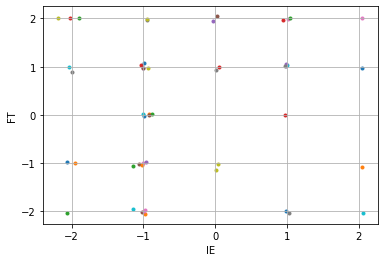

In [5]:
ind1 = 0
ind2 = 2

N = np.random.randn(A.shape[0],A.shape[1])
AN = A + 0.05*N
for n in range(len(AN)):
  plt.scatter(AN[n,ind1],AN[n,ind2],marker='.')

plt.grid('on')
plt.xlabel(col_names[ind1])
plt.ylabel(col_names[ind2])
plt.show()

- 모든 row vector의 length를 1로 변환하기

In [6]:
ANu = np.zeros_like(AN)
for n in range(len(AN)):
  ANu[n] = AN[n]/np.sum(np.abs(AN[n])**2)**(0.5)

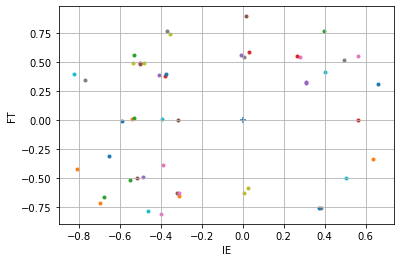

In [7]:
ind1 = 0
ind2 = 2
for n in range(len(ANu)):
  plt.scatter(ANu[n,ind1],ANu[n,ind2],marker='.')
plt.scatter(0,0,marker='+')
plt.grid('on')
plt.xlabel(col_names[ind1])
plt.ylabel(col_names[ind2])
plt.show()

- ID_ref에 본인의 index를 넣고 본인의 데이터가 제대로 출력되는지 확인

In [8]:
ID_ref = 29
ANu[ID_ref]
print(mbti.iloc[ID_ref,:])

print('\nunit vector:')
print(ANu[ID_ref])

이름    김유빈
IE     -1
NS      0
FT     -2
PJ     -1
Name: 29, dtype: object

unit vector:
[-0.46245261  0.01530967 -0.78810043 -0.40595677]


- 나와 가장 비슷하거나 다른 성향을 가진 학생을 찾기

In [9]:
ku = ANu[ID_ref]
SS = np.dot(ANu,ku)

#SS = np.zeros((len(A),1))
#for n in range(len(A)):
#  SS[n] = np.dot(ku,ANu[n])

SS[ID_ref] = 0.5 # 자기 자신이 1로 제일 높으므로 제외하기 위해 임의로 0.5를 넣자.

# dot product가 가장 큰, 가장 작은, 0에 가장 가까운 사람을 찾기
SS_max = np.argmax(SS)
SS_min = np.argmin(SS)
SS_zero = np.argmin(np.abs(SS))

print(SS[SS_max], SS[SS_min], SS[SS_zero])

0.9646723399895538 -0.9337783898881833 -0.01613609594756643


In [10]:
print('dot product결과가 가장 높은 학생')
print(mbti.iloc[SS_max])

print('\nunit vector:')
print(ANu[SS_max])

dot product결과가 가장 높은 학생
이름    정우진
IE     -2
NS      0
FT     -2
PJ     -1
Name: 2, dtype: object

unit vector:
[-0.67826512 -0.00296739 -0.66415968 -0.31438755]


In [11]:
print('dot product결과가 가장 낮은 학생')
print(mbti.iloc[SS_min])
print('\nunit vector:')
print(ANu[SS_min])

dot product결과가 가장 낮은 학생
이름    이은서
IE      1
NS     -1
FT      2
PJ      1
Name: 42, dtype: object

unit vector:
[ 0.39870987 -0.36699819  0.76846091  0.34030956]


In [12]:
print('dot product 절대값이 가장 작은 학생 ~ perpendicular')
print(mbti.iloc[SS_zero])
print('\nunit vector:')
print(ANu[SS_zero])

dot product 절대값이 가장 작은 학생 ~ perpendicular
이름    이유빈
IE     -1
NS     -1
FT      0
PJ      1
Name: 22, dtype: object

unit vector:
[-0.5332864  -0.60356389  0.01648272  0.59249014]


In [13]:
ind_ss = np.argsort(SS)[::-1]
print('나와 비슷한 MBTI를 가진 학생들 - Top 5')
mbti.iloc[ind_ss[:5],0]

나와 비슷한 MBTI를 가진 학생들 - Top 5


2     정우진
15    김형지
31    문정빈
32    박성호
44    임도연
Name: 이름, dtype: object